In [1]:
import pandas as pd
import numpy as np
from database.db_api import db_api

db = db_api()

Setting database to ip: 127.0.0.1, port 3306


In [12]:
def show_msus(msus):
    for msu in msus:
        print "Id: {msu.msu}, Type: {msu.msu_type.name}".format(msu = msu)
msus = db.get_items('msus')
show_msus(msus)

Connected to database
Id: 10, Type: socket
Id: 11, Type: socket
Id: 12, Type: socket
Id: 13, Type: http
Id: 14, Type: http
Id: 15, Type: http
Id: 16, Type: read
Id: 17, Type: read
Id: 18, Type: read
Id: 19, Type: read
Id: 20, Type: read
Id: 21, Type: read
Id: 22, Type: read
Id: 23, Type: read
Id: 24, Type: read
Id: 25, Type: regex
Id: 26, Type: regex
Id: 27, Type: regex
Id: 28, Type: regex
Id: 29, Type: regex
Id: 30, Type: regex
Id: 31, Type: regex_route
Id: 32, Type: regex_route
Id: 33, Type: regex_route
Id: 34, Type: write
Id: 35, Type: write
Id: 36, Type: write


In [23]:
def get_msu(msu_id):
    return [msu for msu in msus if msu.msu == msu_id][0]

def get_msu_type(msu_id):
    return get_msu(msu_id).msu_type.name

def sample_msu_ids_by_type():
    types = set([msu.msu_type.name for msu in msus])
    ids = [[m.msu for m in msus if m.msu_type.name == t][0] for t in types]
    return ids

def res_round(x, resolution):
    return ((x / resolution).round() * resolution).astype(x.dtype)

def get_msu_df(msu):
    print "Getting dataframe for msu {msu.msu} ({msu.msu_type.name})".format(msu=msu)
    df = db.get_msu_full_df(msu)
    trange = (max(df.TIME) - min(df.TIME)) * 1e-9
    spp = round(trange / len(df), 2)
    print "\n # Points: {}\n Time range: {} seconds\n Points / second: ~{}".format(
        len(df), trange, 1/spp)

    rounded_time = res_round(df.TIME, spp * 1e9)

    epoch = ((rounded_time - min(rounded_time)) / (spp * 1e9)).astype(int)
    df = df.assign(msu_id = msu.msu)
    df = df.assign(epoch = epoch)
    df = df.set_index('TIME')
    df = df.assign(TIME = df.index)
    return df    

AGGREGATE_STAT_TYPES = (
 "ERROR_COUNT",
 "MSU_USER_TIME", "MSU_KERNEL_TIME",
 "MSU_MINOR_FAULTS", "MSU_MAJOR_FAULTS",
 "MSU_VOL_CTX_SW","MSU_INVOL_CTX_SW",
)

def make_numeric(df):
    for x in df.columns:
        df[x] = pd.to_numeric(df[x])

def convert_to_rates(msu, types=AGGREGATE_STAT_TYPES):
    for t in types:
        df[t] = df[t].diff() / df.TIME.diff()

MSU_IDS = sample_msu_ids_by_type()
        
#dataset = pd.concat([get_msu_df(get_msu(i)) for i in MSU_IDS])
dataset = get_msu_df(get_msu(13))
make_numeric(dataset)
convert_to_rates(dataset)


Getting dataframe for msu 13 (http)
Connected to database
Connected to database

 # Points: 4495
 Time range: 2247.80013329 seconds
 Points / second: ~2.0


In [24]:
# sudo pip install tensorflow; sudo pip install keras
from keras.layers import LSTM

dataset

,ERROR_COUNT,EXEC_TIME,IDLE_TIME,ITEMS_PROCESSED,MEMORY_ALLOCATED,MSU_INVOL_CTX_SW,MSU_KERNEL_TIME,MSU_MAJOR_FAULTS,MSU_MINOR_FAULTS,MSU_USER_TIME,MSU_VOL_CTX_SW,NUM_STATES,QUEUE_LEN,msu_id,epoch,TIME
TIME,,,,,,,,,,,,,,,,
1512667243227255594,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,13,0,1512667243227255594
1512667243727259179,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,13,1,1512667243727259179
1512667244227262764,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,13,2,1512667244227262764
1512667244727266346,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,13,3,1512667244727266346
1512667245227269938,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,13,4,1512667245227269938
1512667245727273522,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,13,5,1512667245727273522
1512667246227277103,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,13,6,1512667246227277103
1512667246727280694,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,13,7,1512667246727280694
1512667247227284280,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.00,0.0,0.0,0.0,13,8,1512667247227284280


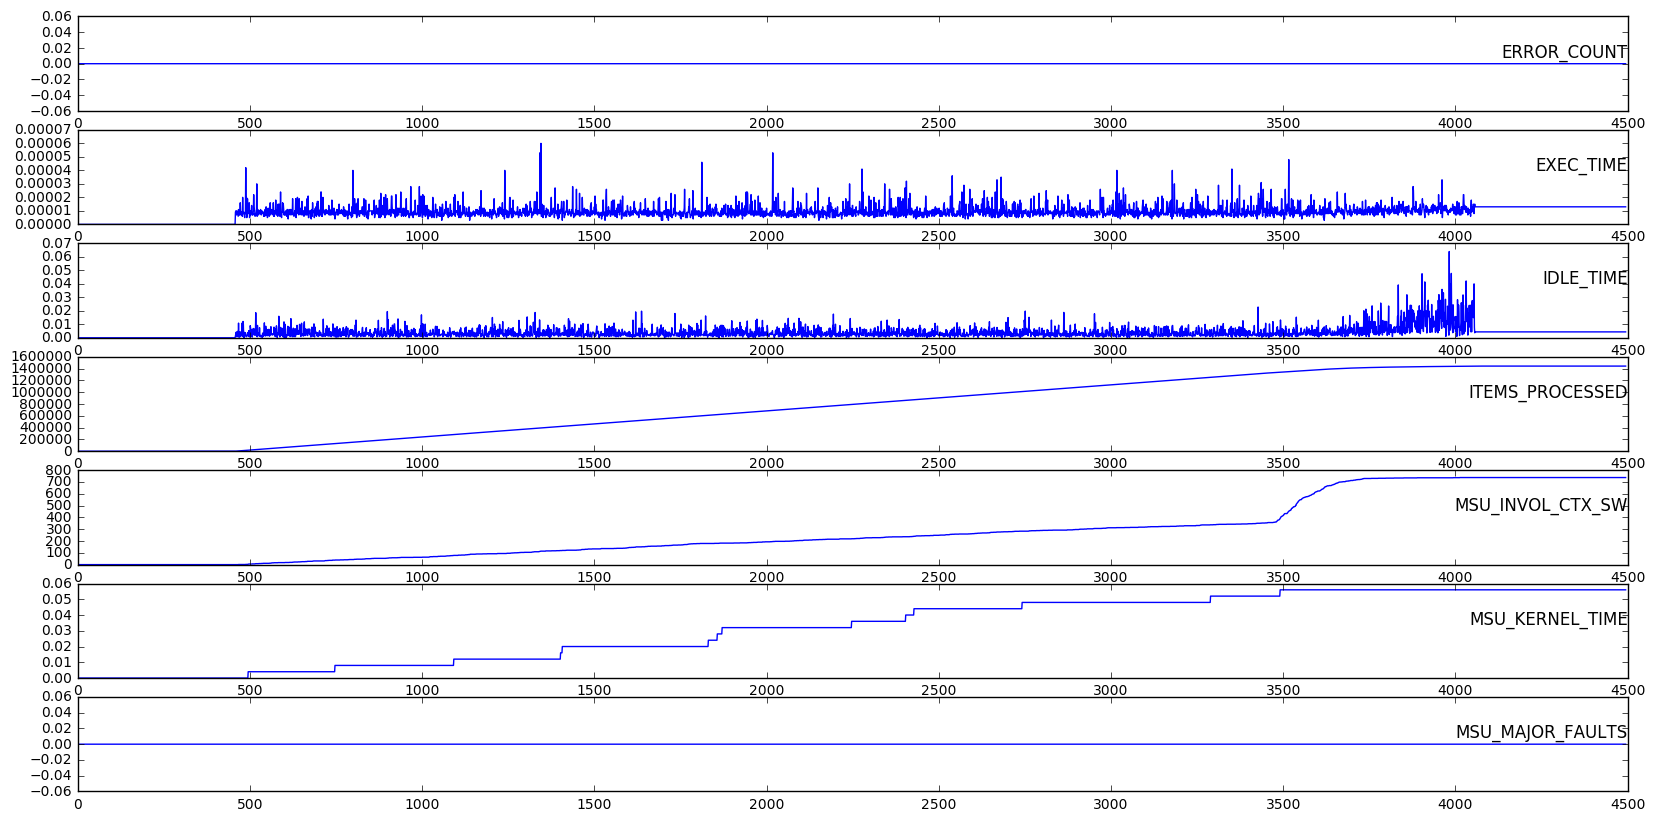

In [25]:
from matplotlib import pyplot
%matplotlib inline

values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure(figsize=(20, 10))
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()